In [3]:
 import pandas as pd
import my_utils as mu
from tqdm import tqdm
tqdm.pandas()

In [146]:
mu.oracle_open()
df = mu.oracle_execute('select * from lol_matches_tier')
mu.oracle_close()

oracle open!


C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


'오라클 닫힘'

In [9]:
sql_conn = mu.connect_mysql('lol_icia')
df = pd.DataFrame(mu.mysql_execute_dict('select * from lol_matches_tier', sql_conn))
sql_conn.close()

In [12]:
df

,MATCH_ID,GAMEDURATION,GAMEVERSION,SUMMONERNAME,SUMMONERLEVEL,PARTICIPANTID,CHAMPIONNAME,CHAMPEXPERIENCE,TEAMPOSITION,TEAMID,...,G_16,G_17,G_18,G_19,G_20,G_21,G_22,G_23,G_24,G_25
0,KR_6407032196,1183,13.5.495.8836,하나는 귀여워,178,1,Darius,9080,TOP,100,...,0,0,0,0,0,0,0,0,0,0
1,KR_6407032196,1183,13.5.495.8836,I Precious,45,2,Kindred,10311,JUNGLE,100,...,0,0,0,0,0,0,0,0,0,0
2,KR_6407032196,1183,13.5.495.8836,강셩일,64,3,Leblanc,10737,MIDDLE,100,...,0,0,0,0,0,0,0,0,0,0
3,KR_6407032196,1183,13.5.495.8836,체빛나,401,4,Jinx,8016,BOTTOM,100,...,0,0,0,0,0,0,0,0,0,0
4,KR_6407032196,1183,13.5.495.8836,굳세어라 채이야,470,5,Lulu,7096,UTILITY,100,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35780,KR_6404307260,1377,13.5.495.8836,죽림초,812,6,Jax,10654,TOP,200,...,5026,5687,6454,7135,7257,7554,8094,9211,0,0
35781,KR_6404307260,1377,13.5.495.8836,HLE Key1,639,7,Vi,8102,JUNGLE,200,...,6673,7075,7294,7452,7574,7767,8009,8467,0,0
35782,KR_6404307260,1377,13.5.495.8836,xxmm,79,8,Ahri,10769,MIDDLE,200,...,6276,6548,6783,7205,7411,7674,8019,8151,0,0
35783,KR_6404307260,1377,13.5.495.8836,OneZang,570,9,Jinx,8041,BOTTOM,200,...,6908,7678,8024,8653,8866,9435,9843,10050,0,0


In [148]:
my_df = df[df.MATCH_ID == 'KR_6404307260']

In [149]:
my_df = my_df[['MATCH_ID','SUMMONERNAME','CHAMPIONNAME','TEAMPOSITION','TEAMID','WIN','KILLS','DEATHS','ASSISTS','G_14']]

In [150]:
blue_team = my_df[my_df.TEAMID == 100]
red_team = my_df[my_df.TEAMID == 200]

In [151]:
red_team = red_team.drop(columns = ['TEAMID', 'WIN']).rename(columns = {'SUMMONERNAME':'red_SUMMONERNAME','CHAMPIONNAME':'red_CHAMPIONNAME','KILLS':'red_KILLS','DEATHS':'red_DEATHS','ASSISTS':'red_ASSISTS','G_14':'red_G_14'})

In [152]:
blue_team.sort_values(by=['G_14'], ascending=False)

,MATCH_ID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G_14
20841,KR_6404307260,슈퍼빅고수,Xayah,BOTTOM,100,True,22,5,10,7775
20838,KR_6404307260,삼각 도끼,Fiora,TOP,100,True,7,4,6,5762
20840,KR_6404307260,kyeahoo,Lissandra,MIDDLE,100,True,7,0,15,5678
20839,KR_6404307260,Michi Wo Yuke,LeeSin,JUNGLE,100,True,7,5,11,5657
20842,KR_6404307260,Honpi,Rakan,UTILITY,100,True,1,3,32,4975


In [153]:
red_team.sort_values(by=['red_G_14'], ascending=False)

,MATCH_ID,red_SUMMONERNAME,red_CHAMPIONNAME,TEAMPOSITION,red_KILLS,red_DEATHS,red_ASSISTS,red_G_14
20844,KR_6404307260,HLE Key1,Vi,JUNGLE,3,9,9,5579
20846,KR_6404307260,OneZang,Jinx,BOTTOM,5,11,4,5570
20845,KR_6404307260,xxmm,Ahri,MIDDLE,3,6,9,5547
20843,KR_6404307260,죽림초,Jax,TOP,4,7,1,4463
20847,KR_6404307260,농심라면다내꺼야,Thresh,UTILITY,1,11,7,3006


In [154]:
game_stat_df = pd.merge(blue_team, red_team, on = ['MATCH_ID', 'TEAMPOSITION'])

In [155]:
game_stat_df

,MATCH_ID,SUMMONERNAME,CHAMPIONNAME,TEAMPOSITION,TEAMID,WIN,KILLS,DEATHS,ASSISTS,G_14,red_SUMMONERNAME,red_CHAMPIONNAME,red_KILLS,red_DEATHS,red_ASSISTS,red_G_14
0,KR_6404307260,삼각 도끼,Fiora,TOP,100,True,7,4,6,5762,죽림초,Jax,4,7,1,4463
1,KR_6404307260,Michi Wo Yuke,LeeSin,JUNGLE,100,True,7,5,11,5657,HLE Key1,Vi,3,9,9,5579
2,KR_6404307260,kyeahoo,Lissandra,MIDDLE,100,True,7,0,15,5678,xxmm,Ahri,3,6,9,5547
3,KR_6404307260,슈퍼빅고수,Xayah,BOTTOM,100,True,22,5,10,7775,OneZang,Jinx,5,11,4,5570
4,KR_6404307260,Honpi,Rakan,UTILITY,100,True,1,3,32,4975,농심라면다내꺼야,Thresh,1,11,7,3006


In [ ]:
# game_stat_df['lane_win'] = 'blue_win', 'draw', 'red_win'

In [156]:
game_stat_df['lane_win'] = 'none'

In [ ]:
# game_stat_df['lane_win'] = game_stat_df.apply(lambda x:win(x), axis=1)

In [157]:
game_stat_df.apply(lambda x: win(x), axis=1)

0    None
1    None
2    None
3    None
4    None
dtype: object

In [41]:
def win(f):
    if f.G_14>f.red_G_14:
        game_stat_df['lane_win']='blue_win'
        # return 'blue_win'
    elif f.G_14<f.red_G_14:
        game_stat_df['lane_win']='red_win'
        # return 'red_win'
    else:
        game_stat_df['lane_win']='draw'
        # return 'draw'

In [158]:
my_df2 = df[['MATCH_ID', 'CHAMPIONNAME', 'TEAMID', 'TEAMPOSITION', 'WIN', 'G_14']]

In [159]:
my_df2['WIN']=my_df2['WIN'].apply(lambda x:1 if x=='True' else 0)

C:\Users\user\AppData\Local\Temp\ipykernel_6600\1987128389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df2['WIN']=my_df2['WIN'].apply(lambda x:1 if x=='True' else 0)


In [160]:
my_df2

,MATCH_ID,CHAMPIONNAME,TEAMID,TEAMPOSITION,WIN,G_14
0,KR_6406921213,Chogath,200,BOTTOM,0,4539
1,KR_6400638396,Viego,100,JUNGLE,0,4417
2,KR_6400638396,Ahri,100,MIDDLE,0,3927
3,KR_6400638396,Ezreal,100,BOTTOM,0,5140
4,KR_6400638396,Yuumi,100,UTILITY,0,4759
...,...,...,...,...,...,...
38795,KR_6406811347,AurelionSol,200,MIDDLE,1,4973
38796,KR_6406811347,Sivir,200,BOTTOM,1,5376
38797,KR_6406811347,Pyke,200,UTILITY,1,5046
38798,KR_6408301615,Gragas,100,TOP,0,4488


In [161]:
cnt_df = my_df2.groupby(['CHAMPIONNAME', 'TEAMPOSITION'])[['WIN']].count().rename(columns={'WIN': 'COUNT'})

KeyError: 'CHAMPIONcNAME'

In [162]:
cnt_df

COUNT
CHAMPIONNAME TEAMPOSITION       
Aatrox       BOTTOM            1
             JUNGLE            2
             MIDDLE           11
             TOP             154
             UTILITY           3
...                          ...
Zoe          UTILITY          10
Zyra         JUNGLE            3
             MIDDLE            4
             TOP               1
             UTILITY          93

[596 rows x 1 columns]

In [165]:
win_df = my_df2.groupby(['CHAMPIONNAME', 'TEAMPOSITION'])[['WIN']].sum()

In [166]:
win_df

WIN
CHAMPIONNAME TEAMPOSITION     
Aatrox       BOTTOM          1
             JUNGLE          1
             MIDDLE          8
             TOP            86
             UTILITY         0
...                        ...
Zoe          UTILITY         7
Zyra         JUNGLE          1
             MIDDLE          0
             TOP             0
             UTILITY        37

[607 rows x 1 columns]

In [167]:
cnt_win_df = pd.merge(cnt_df, win_df, on=['CHAMPIONNAME', 'TEAMPOSITION'])

In [168]:
cnt_win_df

COUNT  WIN
CHAMPIONNAME TEAMPOSITION            
Aatrox       BOTTOM            1    1
             JUNGLE            2    1
             MIDDLE           11    8
             TOP             154   86
             UTILITY           3    0
...                          ...  ...
Zoe          UTILITY          10    7
Zyra         JUNGLE            3    1
             MIDDLE            4    0
             TOP               1    0
             UTILITY          93   37

[568 rows x 2 columns]

In [169]:
cnt_win_df['win_rate'] = round(cnt_win_df['WIN'] / cnt_win_df['COUNT'], 4)

In [170]:
cnt_win_df

COUNT  WIN  win_rate
CHAMPIONNAME TEAMPOSITION                      
Aatrox       BOTTOM            1    1    1.0000
             JUNGLE            2    1    0.5000
             MIDDLE           11    8    0.7273
             TOP             154   86    0.5584
             UTILITY           3    0    0.0000
...                          ...  ...       ...
Zoe          UTILITY          10    7    0.7000
Zyra         JUNGLE            3    1    0.3333
             MIDDLE            4    0    0.0000
             TOP               1    0    0.0000
             UTILITY          93   37    0.3978

[568 rows x 3 columns]

In [60]:
cnt_win_df.sort_values(by=['win_rate'], ascending=False)[:60]

COUNT  WIN  win_rate
CHAMPIONNAME TEAMPOSITION                      
Aatrox       BOTTOM            1    1       1.0
Neeko        TOP               4    4       1.0
Gragas       BOTTOM            1    1       1.0
Camille      JUNGLE            2    2       1.0
RekSai       TOP               1    1       1.0
Rammus       UTILITY           2    2       1.0
             MIDDLE            1    1       1.0
TwistedFate  UTILITY           2    2       1.0
Urgot        BOTTOM            1    1       1.0
             MIDDLE            2    2       1.0
Qiyana       UTILITY           1    1       1.0
             TOP               2    2       1.0
Shen         MIDDLE            3    3       1.0
Velkoz       BOTTOM            3    3       1.0
Orianna      BOTTOM            1    1       1.0
Nunu         UTILITY           2    2       1.0
Belveth      MIDDLE            2    2       1.0
Vex          TOP               1    1       1.0
Jax          BOTTOM            2    2       1.0
Renekton     UTILITY           1    1       1.0
Gangplank    UTILITY           1    1       1.0
Riven        JUNGLE            2    2       1.0
Khazix       UTILITY           1    1       1.0
Shaco        MIDDLE            1    1       1.0
Sion         BOTTOM            1    1       1.0
Sivir        MIDDLE            1    1       1.0
             UTILITY           1    1       1.0
Draven       JUNGLE            1    1       1.0
DrMundo      UTILITY           1    1       1.0
Skarner      TOP               3    3       1.0
Soraka       MIDDLE            1    1       1.0
Samira       JUNGLE            2    2       1.0
Diana        BOTTOM            1    1       1.0
Darius       UTILITY           1    1       1.0
Fiora        MIDDLE            3    3       1.0
Syndra       BOTTOM            2    2       1.0
TahmKench    JUNGLE            1    1       1.0
Senna        MIDDLE            2    2       1.0
Fizz         TOP               2    2       1.0
Nidalee      BOTTOM            1    1       1.0
Orianna      UTILITY           2    2       1.0
Nautilus     MIDDLE            1    1       1.0
Xayah        TOP               1    1       1.0
Annie        JUNGLE            1    1       1.0
Warwick      BOTTOM            1    1       1.0
Maokai       MIDDLE            1    1       1.0
Karma        BOTTOM            1    1       1.0
Warwick      MIDDLE            2    2       1.0
Maokai       BOTTOM            2    2       1.0
Lulu         MIDDLE            1    1       1.0
Kaisa        UTILITY           1    1       1.0
Lissandra    UTILITY           4    4       1.0
Yorick       JUNGLE            1    1       1.0
Leona        MIDDLE            1    1       1.0
Kayle        BOTTOM            1    1       1.0
             MIDDLE            2    2       1.0
Ahri         TOP               1    1       1.0
Annie        TOP               2    2       1.0
Elise        BOTTOM            1    1       1.0
Ashe         MIDDLE            2    2       1.0

In [171]:
cnt_win_df.sort_values(by=['COUNT'], ascending=False)

,,COUNT,WIN,win_rate
CHAMPIONNAME,TEAMPOSITION,,,
LeeSin,JUNGLE,985,494,0.5015
Ezreal,BOTTOM,872,437,0.5011
Kaisa,BOTTOM,729,374,0.5130
Jinx,BOTTOM,704,399,0.5668
Xayah,BOTTOM,626,313,0.5000
...,...,...,...,...
Varus,JUNGLE,1,1,1.0000
Urgot,BOTTOM,1,1,1.0000
Udyr,UTILITY,1,1,1.0000


 #  G_14의 포지션 별 챔피언의 골드량 데이터 만들기
 # 탑 60등까지 뽑아내기

In [172]:
my_df2

,MATCH_ID,CHAMPIONNAME,TEAMID,TEAMPOSITION,WIN,G_14
0,KR_6406921213,Chogath,200,BOTTOM,0,4539
1,KR_6400638396,Viego,100,JUNGLE,0,4417
2,KR_6400638396,Ahri,100,MIDDLE,0,3927
3,KR_6400638396,Ezreal,100,BOTTOM,0,5140
4,KR_6400638396,Yuumi,100,UTILITY,0,4759
...,...,...,...,...,...,...
38795,KR_6406811347,AurelionSol,200,MIDDLE,1,4973
38796,KR_6406811347,Sivir,200,BOTTOM,1,5376
38797,KR_6406811347,Pyke,200,UTILITY,1,5046
38798,KR_6408301615,Gragas,100,TOP,0,4488


In [173]:
cnt_df = my_df2.groupby(['CHAMPIONNAME', 'TEAMPOSITION'])[['WIN']].count().rename(columns={'WIN': 'COUNT'})

In [174]:
gold_df = my_df2.groupby(['CHAMPIONNAME', 'TEAMPOSITION'])[['G_14']].mean().round(2)

In [175]:
gold_df

G_14
CHAMPIONNAME TEAMPOSITION         
Aatrox       BOTTOM        5280.00
             JUNGLE        5698.67
             MIDDLE        5132.73
             TOP           5037.51
             UTILITY       4155.00
...                            ...
Zoe          UTILITY       4247.67
Zyra         JUNGLE        4922.00
             MIDDLE        4351.50
             TOP           4829.00
             UTILITY       4096.44

[607 rows x 1 columns]

In [176]:
cnt_gold_df = pd.merge(cnt_df, gold_df, on = ['CHAMPIONNAME', 'TEAMPOSITION'])

In [177]:
cnt_gold_df

COUNT     G_14
CHAMPIONNAME TEAMPOSITION                
Aatrox       BOTTOM            1  5280.00
             JUNGLE            3  5698.67
             MIDDLE           15  5132.73
             TOP             174  5037.51
             UTILITY           2  4155.00
...                          ...      ...
Zoe          UTILITY          15  4247.67
Zyra         JUNGLE            1  4922.00
             MIDDLE            2  4351.50
             TOP               1  4829.00
             UTILITY          81  4096.44

[607 rows x 2 columns]

In [178]:
cnt_gold_df.sort_values(by=['G_14'], ascending=False)[:60]

,,COUNT,G_14
CHAMPIONNAME,TEAMPOSITION,,
Zeri,TOP,1,7536.00
Shaco,MIDDLE,1,7253.00
Kayle,BOTTOM,1,7233.00
Kennen,BOTTOM,1,7086.00
Warwick,BOTTOM,1,7025.00
Urgot,UTILITY,1,6999.00
Nidalee,BOTTOM,1,6978.00
Yorick,JUNGLE,3,6786.67
LeeSin,BOTTOM,1,6681.00


In [179]:
import numpy as np

In [180]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [181]:
my_df = df[df.MATCH_ID == 'KR_6404307260']

In [182]:
my_df.set_index('SUMMONERNAME', inplace=True)

In [183]:
my_df

,MATCH_ID,GAMEDURATION,GAMEVERSION,SUMMONERLEVEL,PARTICIPANTID,CHAMPIONNAME,CHAMPEXPERIENCE,TEAMPOSITION,TEAMID,WIN,...,G_16,G_17,G_18,G_19,G_20,G_21,G_22,G_23,G_24,G_25
SUMMONERNAME,,,,,,,,,,,,,,,,,,,,,
삼각 도끼,KR_6404307260,1377,13.5.495.8836,262,1,Fiora,12871,TOP,100,True,...,7375,7683,8259,8471,8643,10035,10703,11572,0,0
Michi Wo Yuke,KR_6404307260,1377,13.5.495.8836,253,2,LeeSin,11202,JUNGLE,100,True,...,6591,6931,7784,8014,8446,9203,9721,10290,0,0
kyeahoo,KR_6404307260,1377,13.5.495.8836,413,3,Lissandra,14195,MIDDLE,100,True,...,6711,7646,8112,8562,9430,10131,10633,11632,0,0
슈퍼빅고수,KR_6404307260,1377,13.5.495.8836,201,4,Xayah,12833,BOTTOM,100,True,...,9053,10140,11492,12007,13409,14911,15564,16253,0,0
Honpi,KR_6404307260,1377,13.5.495.8836,555,5,Rakan,9484,UTILITY,100,True,...,5806,6655,7139,7355,7864,8054,8550,9078,0,0
죽림초,KR_6404307260,1377,13.5.495.8836,812,6,Jax,10654,TOP,200,False,...,5026,5687,6454,7135,7257,7554,8094,9211,0,0
HLE Key1,KR_6404307260,1377,13.5.495.8836,639,7,Vi,8102,JUNGLE,200,False,...,6673,7075,7294,7452,7574,7767,8009,8467,0,0
xxmm,KR_6404307260,1377,13.5.495.8836,79,8,Ahri,10769,MIDDLE,200,False,...,6276,6548,6783,7205,7411,7674,8019,8151,0,0
OneZang,KR_6404307260,1377,13.5.495.8836,570,9,Jinx,8041,BOTTOM,200,False,...,6908,7678,8024,8653,8866,9435,9843,10050,0,0


In [184]:
my_df.columns

Index(['MATCH_ID', 'GAMEDURATION', 'GAMEVERSION', 'SUMMONERLEVEL',
       'PARTICIPANTID', 'CHAMPIONNAME', 'CHAMPEXPERIENCE', 'TEAMPOSITION',
       'TEAMID', 'WIN', 'KILLS', 'DEATHS', 'ASSISTS',
       'TOTALDAMAGEDEALTTOCHAMPIONS', 'TOTALDAMAGETAKEN', 'G_5', 'G_6', 'G_7',
       'G_8', 'G_9', 'G_10', 'G_11', 'G_12', 'G_13', 'G_14', 'G_15', 'G_16',
       'G_17', 'G_18', 'G_19', 'G_20', 'G_21', 'G_22', 'G_23', 'G_24', 'G_25'],
      dtype='object')

In [185]:
damage = my_df[['TOTALDAMAGEDEALTTOCHAMPIONS']]

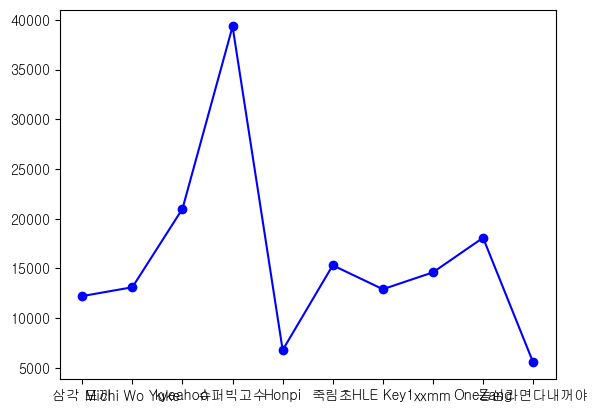

In [186]:
plt.plot(damage, color='blue', marker='o')

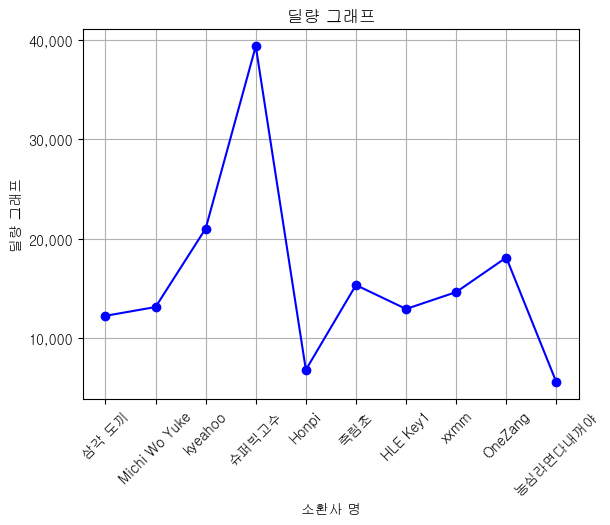

In [187]:
yticks_interval = 10000
maxlim = int((damage.max()/yticks_interval+1)) * yticks_interval
values = np.arange(0,maxlim+1, yticks_interval)
plt.yticks(values,['%s' %format(val, ',') for val in values])

plt.grid(True)
plt.title('딜량 그래프')
plt.xlabel('소환사 명')
plt.ylabel('딜량 그래프')

plt.xticks(rotation=45)
plt.plot(damage, color='blue', marker='o')

In [188]:
tmp_df = df[['TEAMPOSITION', 'TOTALDAMAGEDEALTTOCHAMPIONS', 'TOTALDAMAGETAKEN', 'G_15']]

In [189]:
tmp_df

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G_15
0,BOTTOM,12628,31544,4964
1,JUNGLE,5559,21440,4717
2,MIDDLE,14459,18532,4194
3,BOTTOM,18660,17504,5724
4,UTILITY,6787,6736,5035
...,...,...,...,...
38795,MIDDLE,27584,26822,5625
38796,BOTTOM,47819,25278,6001
38797,UTILITY,18998,32729,5586
38798,TOP,17021,33444,4681


In [190]:
tmp_df = tmp_df[~tmp_df.TEAMPOSITION.isna()]  # na가 아닌 것 만

In [191]:
tmp_df

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G_15
0,BOTTOM,12628,31544,4964
1,JUNGLE,5559,21440,4717
2,MIDDLE,14459,18532,4194
3,BOTTOM,18660,17504,5724
4,UTILITY,6787,6736,5035
...,...,...,...,...
38795,MIDDLE,27584,26822,5625
38796,BOTTOM,47819,25278,6001
38797,UTILITY,18998,32729,5586
38798,TOP,17021,33444,4681


In [192]:
my_tmp = tmp_df[tmp_df.TEAMPOSITION == 'JUNGLE']
my_tmp

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G_15
1,JUNGLE,5559,21440,4717
6,JUNGLE,15414,19523,6287
11,JUNGLE,13064,20604,6865
16,JUNGLE,5954,22384,5304
21,JUNGLE,21487,31513,5078
...,...,...,...,...
38779,JUNGLE,12512,15843,6215
38784,JUNGLE,11397,20451,7116
38789,JUNGLE,21348,40733,5306
38794,JUNGLE,42656,56675,6577


In [193]:
xdata = my_tmp.G_15
ydata = my_tmp.TOTALDAMAGEDEALTTOCHAMPIONS

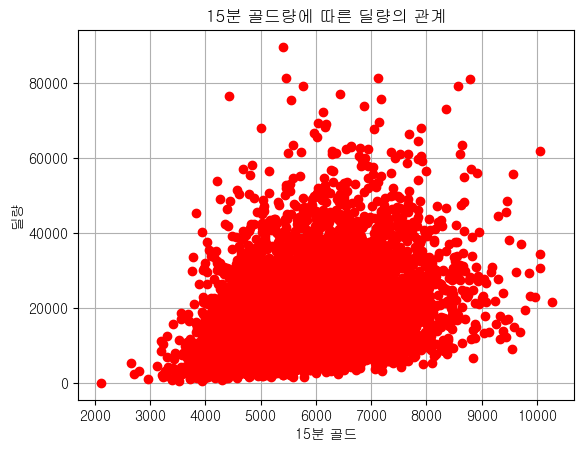

In [194]:
plt.figure()
plt.plot(xdata, ydata, color='r', marker='o', linestyle='None')
plt.xlabel('15분 골드')
plt.ylabel('딜량')
plt.title('15분 골드량에 따른 딜량의 관계')
plt.grid(True)

In [195]:
ydata2 = my_tmp.TOTALDAMAGETAKEN

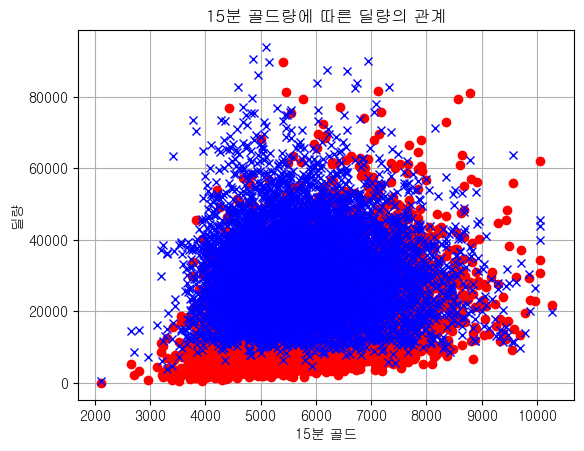

In [196]:
plt.figure()
plt.plot(xdata, ydata, color='r', marker='o', linestyle='None')
plt.plot(xdata, ydata2, color='b', marker='x', linestyle='None')
plt.xlabel('15분 골드')
plt.ylabel('딜량')
plt.title('15분 골드량에 따른 딜량의 관계')
plt.grid(True)

In [197]:
group_df = tmp_df.groupby('TEAMPOSITION').mean().round().reset_index()

In [198]:
group_df

,TEAMPOSITION,TOTALDAMAGEDEALTTOCHAMPIONS,TOTALDAMAGETAKEN,G_15
0,BOTTOM,20494.0,18965.0,5794.0
1,JUNGLE,17539.0,30142.0,5788.0
2,MIDDLE,20501.0,22594.0,5486.0
3,TOP,19712.0,26897.0,5405.0
4,UTILITY,11149.0,17454.0,4176.0


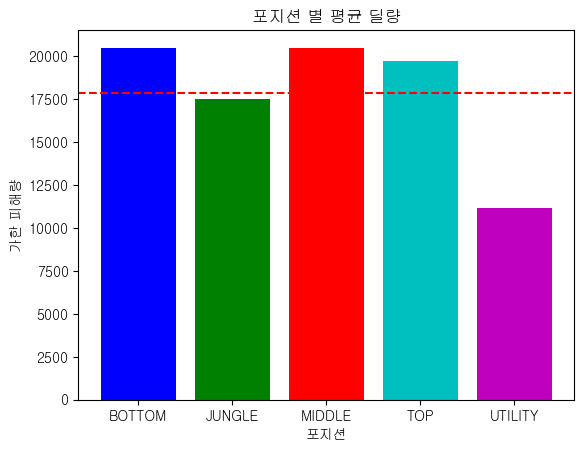

In [205]:
plt.figure()
plt.bar(group_df.TEAMPOSITION, group_df.TOTALDAMAGEDEALTTOCHAMPIONS, color=['b', 'g', 'r', 'c', 'm'])
plt.xlabel('포지션')
plt.ylabel('가한 피해량')
plt.title('포지션 별 평균 딜량')

mean_val = group_df.TOTALDAMAGEDEALTTOCHAMPIONS.mean()
plt.axhline(y=mean_val, color='r', linestyle='dashed')

In [208]:
group_df.set_index('TEAMPOSITION', inplace=True)

In [212]:
group_df.loc['BOTTOM']

TOTALDAMAGEDEALTTOCHAMPIONS    20494.0
TOTALDAMAGETAKEN               18965.0
G_15                            5794.0
Name: BOTTOM, dtype: float64

Text(0.5, 1.0, '파이차트')

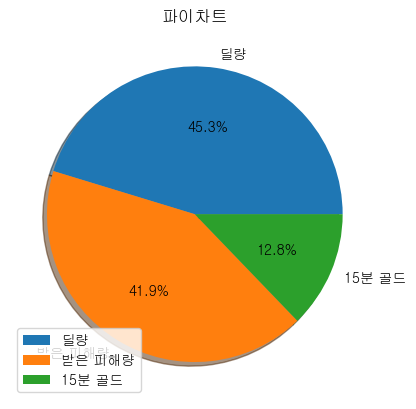

In [232]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'], labels = ['딜량', '받은 피해량', '15분 골드'], shadow=True, autopct='%1.1f%%', explode=(0, 0, 0))
plt.grid(True)
plt.legend(loc=3)
plt.title('파이차트')

In [222]:
import os
import time
from PIL import Image

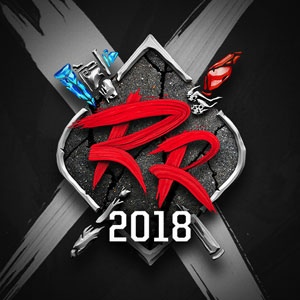

In [262]:
url = 'https://ddragon.leagueoflegends.com/cdn/13.5.1/img/profileicon/3548.png'
os.system("curl "+url+" > test.jpg")
curl_img = Image.open("./test.jpg")
curl_img

Text(0.5, 1.0, '파이차트')

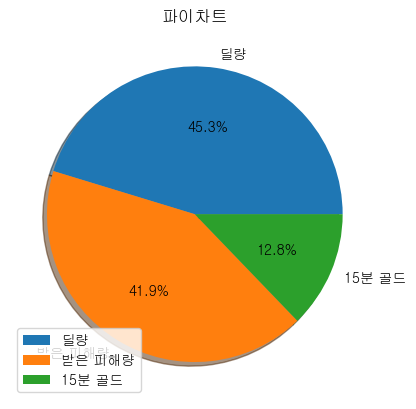

In [235]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'], labels = ['딜량', '받은 피해량', '15분 골드'], shadow=True, autopct='%1.1f%%', explode=(0, 0, 0))
plt.grid(True)
plt.legend(loc=3)
plt.title('파이차트')

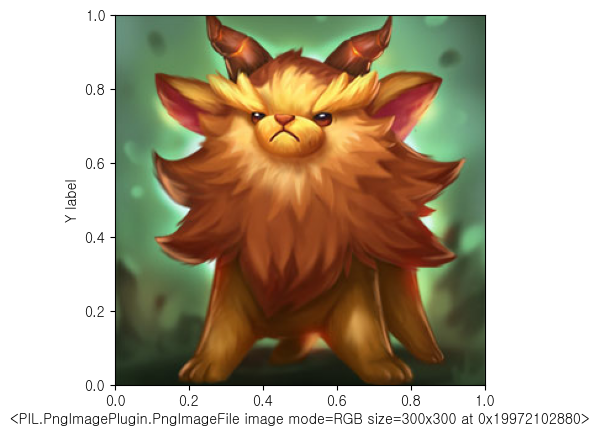

In [243]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 불러오기
img = curl_img

# 그래프 생성
fig, ax = plt.subplots()

# 이미지 추가
ax.imshow(img, extent=[0, 0, 0, 1])

# 라벨 추가
ax.set_xlabel('X label')
ax.set_ylabel('Y label')

# 그래프 출력
plt.show()
